In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy

In [11]:
dc_re = pd.read_csv('/Users/justinsmith/Documents/GitHub/DC_Properties.csv')

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
dc_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

In [13]:
tract_df = pd.read_csv('/Users/justinsmith/Documents/GitHub/raw_census_tracts_in_2010.csv')

In [18]:
dc_re.dropna(subset=['PRICE'], inplace=True)

In [20]:
dc_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98216 entries, 0 to 158955
Data columns (total 49 columns):
Unnamed: 0            98216 non-null int64
BATHRM                98216 non-null int64
HF_BATHRM             98216 non-null int64
HEAT                  98216 non-null object
AC                    98216 non-null object
NUM_UNITS             57900 non-null float64
ROOMS                 98216 non-null int64
BEDRM                 98216 non-null int64
AYB                   98104 non-null float64
YR_RMDL               57674 non-null float64
EYB                   98216 non-null int64
STORIES               57867 non-null float64
SALEDATE              98215 non-null object
PRICE                 98216 non-null float64
QUALIFIED             98216 non-null object
SALE_NUM              98216 non-null int64
GBA                   57900 non-null float64
BLDG_NUM              98216 non-null int64
STYLE                 57900 non-null object
STRUCT                57900 non-null object
GRADE       

In [21]:
dc_re.drop(columns=['STATE', 'CITY', ])

In [22]:
dc_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98216 entries, 0 to 158955
Data columns (total 49 columns):
Unnamed: 0            98216 non-null int64
BATHRM                98216 non-null int64
HF_BATHRM             98216 non-null int64
HEAT                  98216 non-null object
AC                    98216 non-null object
NUM_UNITS             57900 non-null float64
ROOMS                 98216 non-null int64
BEDRM                 98216 non-null int64
AYB                   98104 non-null float64
YR_RMDL               57674 non-null float64
EYB                   98216 non-null int64
STORIES               57867 non-null float64
SALEDATE              98215 non-null object
PRICE                 98216 non-null float64
QUALIFIED             98216 non-null object
SALE_NUM              98216 non-null int64
GBA                   57900 non-null float64
BLDG_NUM              98216 non-null int64
STYLE                 57900 non-null object
STRUCT                57900 non-null object
GRADE       

In [23]:
dc_re_resid = dc_re[dc_re['SOURCE'] == 'Residential']

In [24]:
dc_re_condo = dc_re[dc_re['SOURCE'] != 'Residential']

In [25]:
dc_re_resid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57900 entries, 0 to 106695
Data columns (total 49 columns):
Unnamed: 0            57900 non-null int64
BATHRM                57900 non-null int64
HF_BATHRM             57900 non-null int64
HEAT                  57900 non-null object
AC                    57900 non-null object
NUM_UNITS             57900 non-null float64
ROOMS                 57900 non-null int64
BEDRM                 57900 non-null int64
AYB                   57805 non-null float64
YR_RMDL               33217 non-null float64
EYB                   57900 non-null int64
STORIES               57867 non-null float64
SALEDATE              57899 non-null object
PRICE                 57900 non-null float64
QUALIFIED             57900 non-null object
SALE_NUM              57900 non-null int64
GBA                   57900 non-null float64
BLDG_NUM              57900 non-null int64
STYLE                 57900 non-null object
STRUCT                57900 non-null object
GRADE       

In [26]:
dc_re_condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40316 entries, 106696 to 158955
Data columns (total 49 columns):
Unnamed: 0            40316 non-null int64
BATHRM                40316 non-null int64
HF_BATHRM             40316 non-null int64
HEAT                  40316 non-null object
AC                    40316 non-null object
NUM_UNITS             0 non-null float64
ROOMS                 40316 non-null int64
BEDRM                 40316 non-null int64
AYB                   40299 non-null float64
YR_RMDL               24457 non-null float64
EYB                   40316 non-null int64
STORIES               0 non-null float64
SALEDATE              40316 non-null object
PRICE                 40316 non-null float64
QUALIFIED             40316 non-null object
SALE_NUM              40316 non-null int64
GBA                   0 non-null float64
BLDG_NUM              40316 non-null int64
STYLE                 0 non-null object
STRUCT                0 non-null object
GRADE                 0 non

In [74]:
dc_1900 = dc_re[(dc_re['EYB'] == 1900) & (dc_re['AYB'] == 1900)]

In [104]:
dc_re['diff_yr'] = abs(dc_re['EYB']-dc_re['YR_RMDL'])
dc_re[(dc_re['diff_yr'] > 60) & (dc_re['AYB'] > 1940)].iloc[:,:15]

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED
5556,5556,2,0,Hot Water Rad,N,2.0,6,2,1941.0,2005.0,1943,2.0,2017-01-13 00:00:00,575000.0,U
60472,60472,1,1,Forced Air,N,1.0,6,3,1942.0,2017.0,1954,2.0,2017-02-17 00:00:00,750000.0,Q
72944,72944,3,1,Forced Air,Y,1.0,8,3,1951.0,2016.0,1951,2.0,2017-03-20 00:00:00,495000.0,Q
74876,74876,3,0,Forced Air,N,3.0,9,3,1951.0,2016.0,1951,2.0,2016-12-12 00:00:00,325000.0,Q
75431,75431,2,0,Hot Water Rad,Y,1.0,6,2,1941.0,2008.0,1943,2.0,2008-07-21 00:00:00,155943.0,U
75966,75966,4,0,Hot Water Rad,N,4.0,12,4,1943.0,2015.0,1954,2.0,2015-05-05 00:00:00,379999.0,Q
76676,76676,1,1,Warm Cool,Y,1.0,6,3,1942.0,2017.0,1954,2.0,2017-11-16 00:00:00,458000.0,Q
80785,80785,4,0,Hot Water Rad,N,4.0,12,4,1942.0,2010.0,1943,2.0,2010-08-03 00:00:00,145000.0,U
83109,83109,4,0,Forced Air,Y,4.0,16,4,1941.0,2004.0,1943,2.0,2016-10-07 00:00:00,354000.0,Q
83539,83539,1,0,Forced Air,Y,1.0,5,2,1942.0,2015.0,1954,2.0,2015-04-14 00:00:00,236000.0,Q


In [68]:
dc_re_drop = dc_re[dc_re['EYB'] != 1900]

In [124]:
dc_1900.shape

(661, 50)

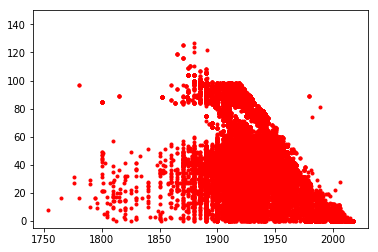

In [69]:
plt.plot(dc_re_drop['AYB'], dc_re_drop['diff_yr'], 'r.')
plt.ylim(ymax=150, ymin=-5)
plt.show()

In [134]:
print(dc_1900[(dc_re['AYB'] == 1900) & (dc_re['diff_yr'] > 80)].iloc[0:50,38:40])


         LATITUDE  LONGITUDE
114931  38.912292 -77.047093
114938  38.907796 -77.047776
114939  38.907796 -77.047776
114949  38.907796 -77.047776
114950  38.907796 -77.047776
114951  38.907796 -77.047776
114971  38.907796 -77.047776
114972  38.907796 -77.047776
114974  38.907796 -77.047776
114975  38.907796 -77.047776
114977  38.907796 -77.047776
115427  38.911995 -77.045887
115430  38.911995 -77.045887
115890  38.904940 -77.053579
115891  38.904940 -77.053579
115892  38.904940 -77.053579
115893  38.904940 -77.053579
116405  38.907796 -77.047776
116408  38.907796 -77.047776
116409  38.907796 -77.047776
116410  38.907796 -77.047776
116411  38.907796 -77.047776
116412  38.907796 -77.047776
116413  38.907796 -77.047776
116414  38.907796 -77.047776
116415  38.907796 -77.047776
116416  38.907796 -77.047776
116417  38.907796 -77.047776
116418  38.907796 -77.047776
116419  38.907796 -77.047776
116421  38.907796 -77.047776
116422  38.907796 -77.047776
116424  38.907796 -77.047776
116425  38.907

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


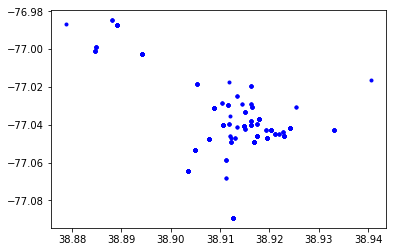

In [125]:
plt.plot(dc_1900['LATITUDE'],dc_1900['LONGITUDE'], 'b.')

In [138]:
print(dc_re[(dc_re['AYB'] >= 1975) & (dc_re['AYB'] <= 1995) & (dc_re['diff_yr'] > 50)].iloc[:,5:14])


        NUM_UNITS  ROOMS  BEDRM     AYB  YR_RMDL   EYB  STORIES  \
108384        NaN      4      2  1989.0   2000.0  1900      NaN   
108385        NaN      4      2  1989.0   2000.0  1900      NaN   
108386        NaN      4      2  1989.0   2000.0  1900      NaN   
108387        NaN      3      1  1989.0   2000.0  1900      NaN   
108389        NaN      4      2  1989.0   2000.0  1900      NaN   
108390        NaN      4      2  1989.0   2000.0  1900      NaN   
108391        NaN      3      1  1989.0   2000.0  1900      NaN   
108392        NaN      4      2  1989.0   2000.0  1900      NaN   
108393        NaN      4      2  1989.0   2000.0  1900      NaN   
108394        NaN      4      2  1989.0   2000.0  1900      NaN   
108395        NaN      3      1  1989.0   2000.0  1900      NaN   
108396        NaN      4      2  1989.0   2000.0  1900      NaN   
108397        NaN      4      2  1989.0   2000.0  1900      NaN   
108398        NaN      4      2  1989.0   2000.0  1900      Na

In [146]:
for i in range(len(dc_1900)):
    if dc_1900[i][8] > dc_1900[i][10]:
        dc_1900[i][10].append(dc_1900[i][8])

KeyError: 0

In [217]:
dc_re_resid['diff_yr'] = abs(dc_re_resid['EYB']- dc_re_resid['YR_RMDL'])

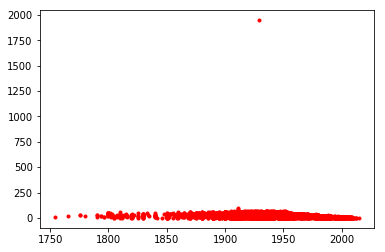

In [149]:
plt.plot(dc_re_resid['AYB'], dc_re_resid['diff_yr'], 'r.')

In [151]:
dc_re_resid[dc_re_resid['diff_yr'] > 200].iloc[:,5:15]

,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED
56600,1.0,8,4,1929.0,20.0,1967,2.0,2015-08-06 00:00:00,335000.0,Q


In [153]:
dc_re_resid = dc_re_resid.drop(index=56600)

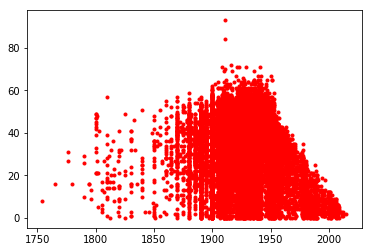

In [154]:
plt.plot(dc_re_resid['AYB'], dc_re_resid['diff_yr'], 'r.')

In [160]:
dc_re_resid[(dc_re_resid['AYB'] > 1900) & (dc_re_resid['AYB'] < 1930) & (dc_re_resid['diff_yr'] > 65)].loc[:,['AYB','LONGITUDE', 'LATITUDE']]

,AYB,LONGITUDE,LATITUDE
12077,1911.0,-76.988497,38.887320
15041,1908.0,-76.992461,38.884587
17845,1917.0,-76.987713,38.890527
19359,1926.0,-76.979779,38.886461
40640,1911.0,-77.042782,38.934350
51208,1910.0,-77.025526,38.945606
56249,1920.0,-77.021809,38.970127
62050,1923.0,-77.016056,38.942372
77455,1916.0,-76.983532,38.929150
81876,1929.0,-76.971689,38.897250


AttributeError: module 'pandas' has no attribute 'dict'